In [1]:
%matplotlib inline
import sys, os, glob, parse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

ligan_dir = '/home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan'
sys.path.append(ligan_dir)

from results import aggregate_data, add_group_column, plot_lines, plot_strips

work_dir = os.path.join(ligan_dir, 'test_atom_fitting')
os.chdir(work_dir)
os.getcwd()

'/home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting'

In [2]:
metric_files = glob.glob('asdf/*.gen_metrics') + glob.glob('1ajv/n_*.gen_metrics')
len(metric_files)

47

In [22]:
name_format = 'n_{r_factor:d}_{beam_size:d}_{interm_iters:d}_{final_iters:d}'
old_name_format = 'n_{beam_size:d}_{interm_iters:d}_{final_iters:d}'

remove_cols = ['lig_norm', 'lig_gen_norm', 'lig_gen_loss',
               'lig_var', 'lig_gen_var',
               'lig_fit_n_atoms', 'lig_gen_fit_n_atoms',
               'lig_fit_radius', 'lig_gen_fit_radius']

fit_dfs = []
for metric_file in metric_files:
    fit_df = pd.read_csv(metric_file, sep=' ')
    
    for c in remove_cols:
        del fit_df[c]
    
    fit_dir = os.path.dirname(metric_file)
    fit_name = os.path.splitext(os.path.basename(metric_file))[0]
    
    if fit_dir == 'asdf':
        fit_params = parse.parse(name_format, fit_name).named
        fit_params['libmolgrid'] = True
    else:
        fit_params = parse.parse(old_name_format, fit_name).named
        fit_params['r_factor'] = 100
        fit_params['libmolgrid'] = False
        fit_name = name_format.format(**fit_params)
    
    fit_df['fit_name'] = fit_name
    for param, value in fit_params.items():
        fit_df[param] = value
    fit_df['r_factor'] /= 100.
    fit_dfs.append(fit_df)

df = pd.concat(fit_dfs)

metrics = [
    'lig_fit_time',          'lig_gen_fit_time',
    'lig_fit_loss',          'lig_gen_fit_loss',
    'lig_gen_fit_type_diff', 'lig_gen_fit_RMSD'
]

group_cols = ['fit_name', 'libmolgrid']
aggregate_data(df, group_cols, lig_name =pd.Series.nunique, sample_idx=pd.Series.nunique)

,,lig_name,sample_idx,lig_fit_loss,lig_gen_fit_loss,lig_fit_time,lig_gen_fit_time,lig_gen_fit_type_diff,lig_gen_fit_RMSD,r_factor,beam_size,interm_iters,final_iters
fit_name,libmolgrid,,,,,,,,,,,,
n_085_1_10_100,True,1,25,0.013013,48.993925,3.588290,3.354247,13.00,NaN,0.85,1,10,100
n_090_1_10_100,True,1,25,0.013013,46.358464,3.580802,3.142733,5.88,NaN,0.90,1,10,100
n_095_1_0_100,True,1,25,6.993844,36.085734,1.271181,1.102645,6.56,NaN,0.95,1,0,100
n_095_1_10_100,True,1,25,0.013013,43.097409,3.588742,3.057484,2.40,0.444683,0.95,1,10,100
n_095_1_1_10,True,1,25,3.918014,38.646560,1.003468,0.855360,2.72,0.504925,0.95,1,1,10
n_095_1_1_100,True,1,25,1.248957,36.071931,1.513224,1.315886,2.72,0.474578,0.95,1,1,100
n_095_1_1_20,True,1,25,2.188294,37.028599,1.057161,0.907025,2.72,0.467123,0.95,1,1,20
n_095_1_1_50,True,1,25,1.327402,36.187754,1.228256,1.059992,2.72,0.462159,0.95,1,1,50
n_095_1_2_100,True,1,25,0.697602,37.802188,1.746346,1.515071,2.56,NaN,0.95,1,2,100


/home/mtr22/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


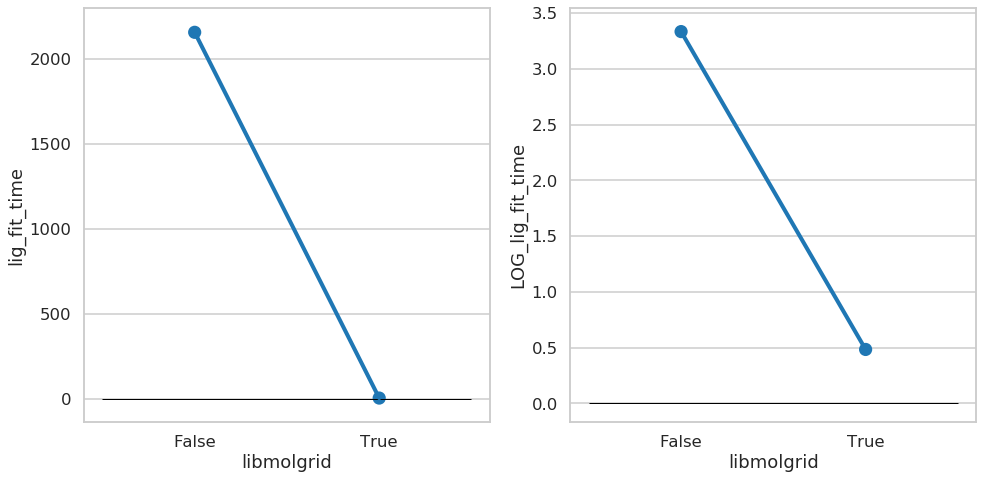

In [24]:
# LIBMOLGRID PERFORMANCE IMPROVEMENT
sns.set_context('talk')
sns.set_style('whitegrid')
fit_names = ['n_100_1_10_10']
plot_df = df[df['fit_name'].isin(fit_names)]
plot_df['LOG_lig_fit_time'] = np.log10(plot_df['lig_fit_time'])
fig = plot_strips('libmolgrid_perf.png', plot_df, x='libmolgrid', y=['lig_fit_time', 'LOG_lig_fit_time'],
                  n_cols=2, height=7, width=7, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

/home/mtr22/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


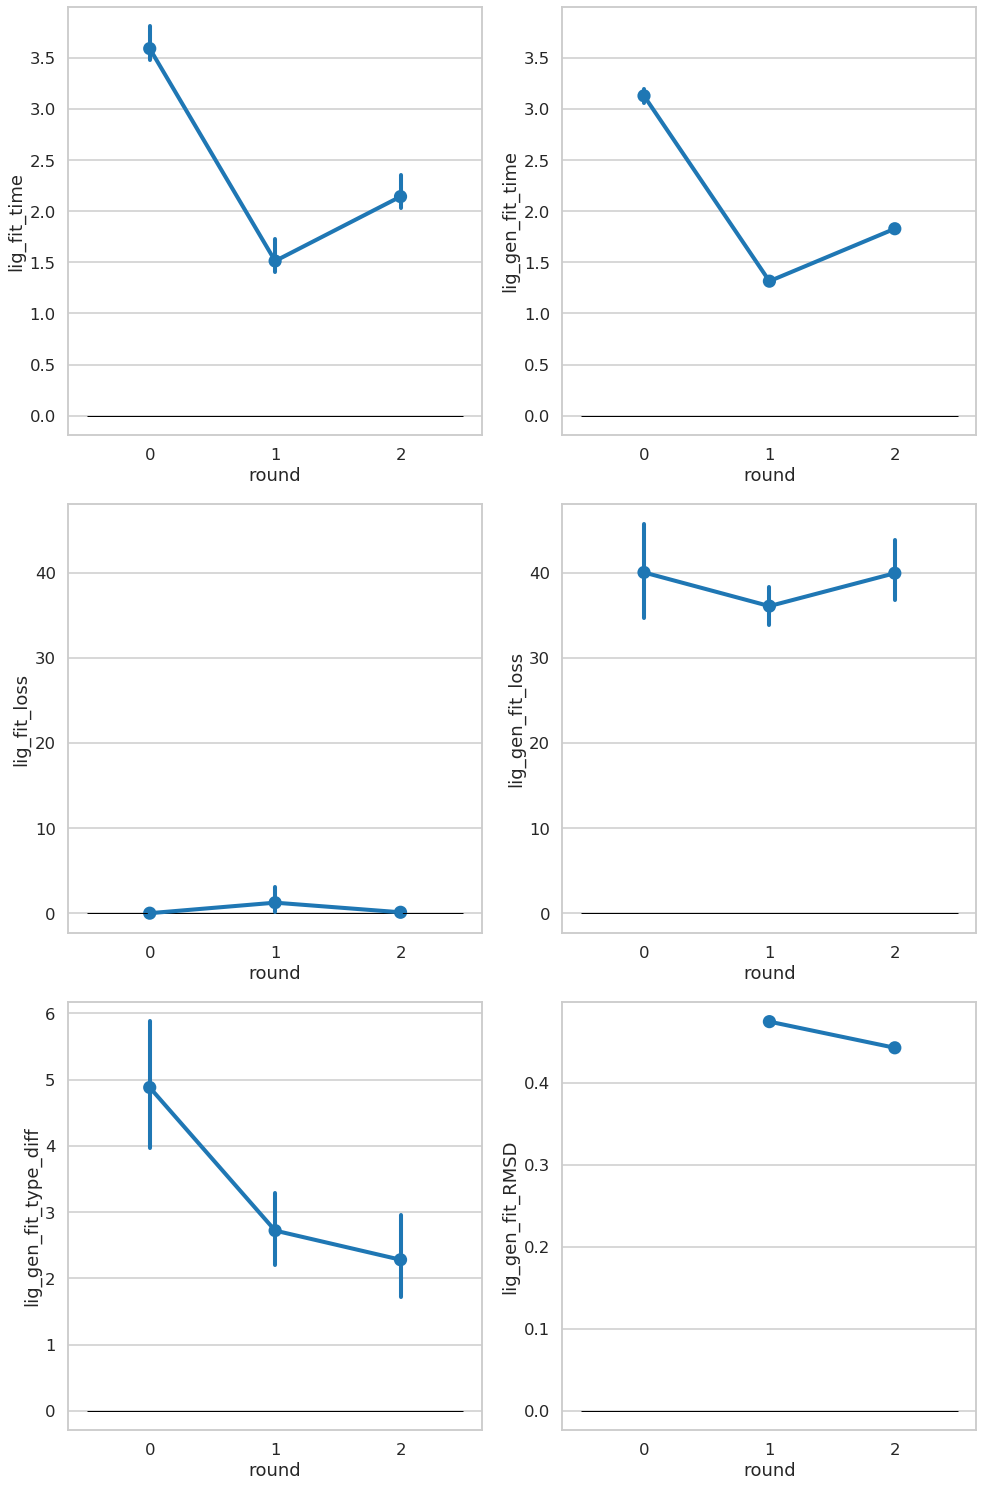

In [20]:
# PARAM SEARCH RESULTS
fit_names = ['n_100_1_10_100', 'n_095_1_1_100', 'n_095_1_5_50']
plot_df = df[df['fit_name'].isin(fit_names)]
plot_df['round'] = plot_df['fit_name'].apply(fit_names.index)
fig = plot_strips('param_search.png', plot_df, x='round', y=metrics,
                  n_cols=2, height=7, width=7, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

# Round 1
```python
r_factor     = 1.00 [0.85, 0.90, 0.95, 1.00]
beam_size    = 1    [1, 2, 3, 4, 5]
interm_iters = 10   [1, 10, 100]
final_iters  = 100  [10, 100, 1000]
```

In [ ]:
# ROUND 1 r_factor
fit_names = ['n_100_1_10_100', 'n_095_1_10_100', 'n_090_1_10_100', 'n_085_1_10_100']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('r_factor.png', plot_df, x='r_factor', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

In [ ]:
plot_df[plot_df['lig_gen_fit_type_diff'] == 0]

In [ ]:
# ROUND 1 interm_iters
fit_names = ['n_100_1_1_100', 'n_100_1_10_100', 'n_100_1_100_100']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('interm_iters.png', plot_df, x='interm_iters', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

In [ ]:
# ROUND 1 final_iters
fit_names = ['n_100_1_10_10', 'n_100_1_10_100', 'n_100_1_10_1000']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('final_iters.png', plot_df, x='final_iters', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

In [ ]:
# ROUND 1 beam_size
fit_names = ['n_100_1_10_100', 'n_100_2_10_100', 'n_100_3_10_100',
             'n_100_4_10_100', 'n_100_5_10_100']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('beam_size.png', plot_df, x='beam_size', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

In [ ]:
# ROUND 1 improvement
agg_df.loc['n_095_1_1_100'] - agg_df.loc['n_100_1_10_100']

# Round 2
```python
r_factor     = 0.95 [0.95]
beam_size    = 1    [1]
interm_iters = 1    [0, 1, 2, 5, 10]
final_iters  = 100  [10, 20, 50, 100]
```

In [ ]:
# ROUND 2 interm_iters
fit_names = ['n_095_1_0_100', 'n_095_1_1_100', 'n_095_1_2_100',
             'n_095_1_5_100', 'n_095_1_10_100']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('interm_iters2.png', plot_df, x='interm_iters', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

In [ ]:
plot_df[plot_df['lig_gen_fit_type_diff'] == 0]

In [ ]:
# ROUND 2 final_iters
fit_names = ['n_095_1_1_10', 'n_095_1_1_20', 'n_095_1_1_50', 'n_095_1_1_100']
plot_df = df[df['fit_name'].isin(fit_names)]
fig = plot_strips('final_iters2.png', plot_df, x='final_iters', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()

# Final
```python
r_factor     = 0.95
beam_size    = 1
interm_iters = 5
final_iters  = 50
```

In [ ]:
# PARAM SEARCH RESULTS
fit_names = ['n_100_1_10_100', 'n_095_1_1_100', 'n_095_1_5_50']
plot_df = df[df['fit_name'].isin(fit_names)]
plot_df['round'] = plot_df['fit_name'].apply(fit_names.index)
fig = plot_strips('param_search.png', plot_df, x='round', y=metrics,
                  n_cols=2, height=4, width=4, point=True,
                  share_ylim_pat=r'^lig_(gen_)?')
plt.show()